In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
              'wage_class'] 
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
#CHECKING FOR NULL VALUES IN TRAIN SET
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
#CHECKING FOR NULL VALUES IN TEST SET
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [8]:
def data_preprocessing(df):
    df.convert_objects(convert_numeric=True)
    df.fillna(0, inplace=True) 
    
    return df


def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            x = 0            
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [9]:
df_train = data_preprocessing(train_set)
df_train = handle_non_numeric_data(train_set)
print(df_train.head())

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          5   77516          1             13               2   
1   50          4   83311          1             13               4   
2   38          3  215646         10              9               1   
3   53          3  234721          8              7               4   
4   28          3  338409          1             13               4   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           9             3     0    1          2174             0   
1           3             0     0    1             0             0   
2           5             3     0    1             0             0   
3           5             0     4    1             0             0   
4          13             5     4    0             0             0   

   hours_per_week  native_country  wage_class  
0              40              21           1  
1              13              21           1  
2       

In [10]:
df_test = data_preprocessing(test_set)
df_test = handle_non_numeric_data(test_set)
print(df_test.head())

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   25          3  226802          8              7               2   
1   38          3   89814         11              9               4   
2   28          2  336951          4             12               4   
3   44          3  160323         10             10               4   
4   18          7  103497         10             10               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           8             2     4    1             0             0   
1           6             0     0    1             0             0   
2          10             0     0    1             0             0   
3           8             0     4    1          7688             0   
4          11             2     0    0             0             0   

   hours_per_week  native_country  wage_class  
0              40              21           1  
1              50              21           1  
2       

In [11]:
x_test = df_test.drop(['wage_class'], 1)
y_test = df_test['wage_class']

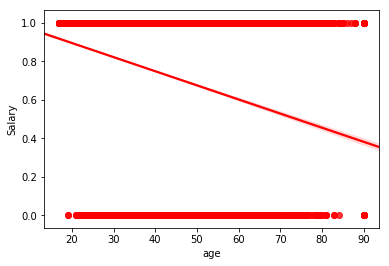

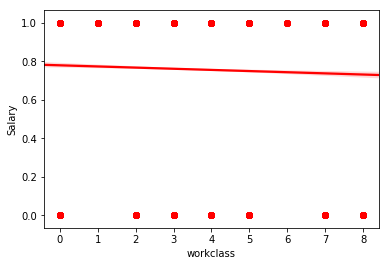

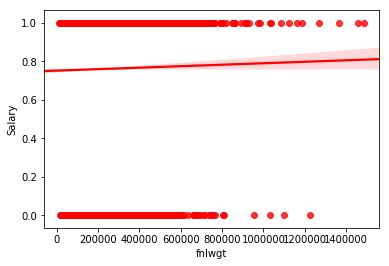

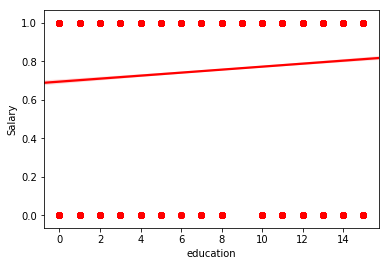

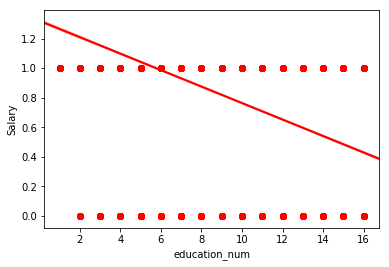

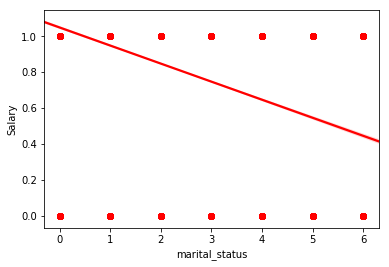

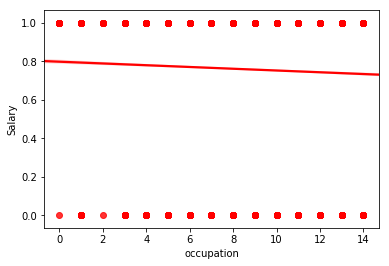

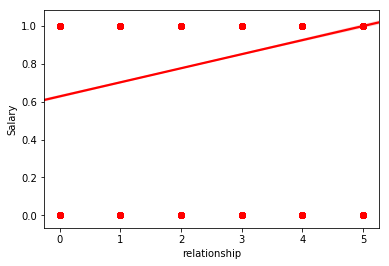

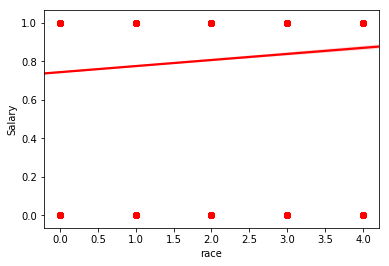

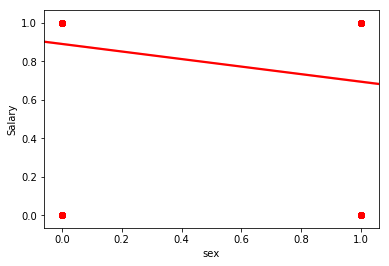

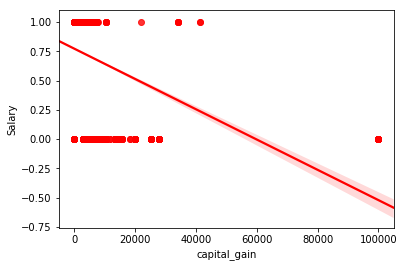

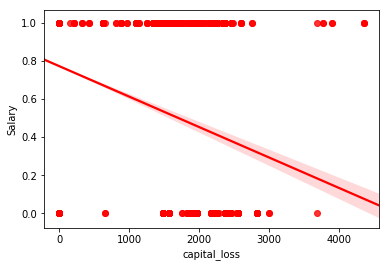

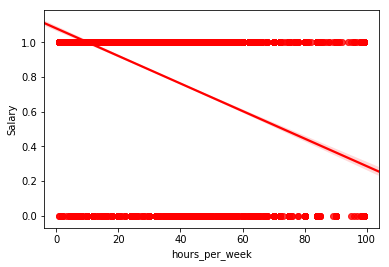

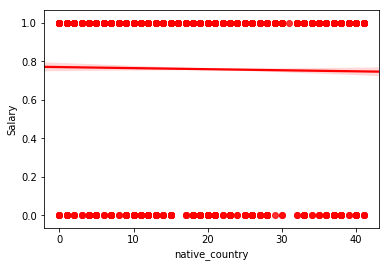

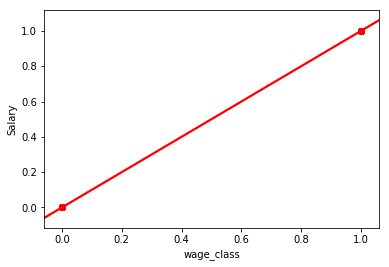

In [13]:
#Graph between features and target price
for var in train_set.columns:
    sns.regplot(train_set[var], train_set['wage_class'], color='r')
    plt.ylabel('Salary')
    plt.show()

In [14]:
#split training dataset for cross validation
df_x = df_train.drop(['wage_class'], 1)
df_y = df_train['wage_class']

In [15]:
x_train,x_cv,y_train,y_cv = train_test_split(df_x,df_y,test_size=0.2,random_state=5)

models = pd.DataFrame(index=['train_mse','cv_mse','test_mse','accuracy_score'], columns=['XGBOOST Classifier 1','XGBOOST Classifier 2','XGBOOST Classifier 3','XGBOOST Classifier 4'])

In [16]:
#Apply Model and calculate error/accuracy
Boosting_Cls1 = xgb.XGBClassifier(n_estimators=150,learning_rate=1)
Boosting_Cls1.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 1'] = mean_squared_error(y_pred=Boosting_Cls1.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 1'] = mean_squared_error(y_pred=Boosting_Cls1.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 1'] = mean_squared_error(y_pred=Boosting_Cls1.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 1'] = accuracy_score(y_pred=Boosting_Cls1.predict(x_test).round(), y_true=y_test)

Boosting_Cls2 = xgb.XGBClassifier(n_estimators=150,learning_rate=0.001)
Boosting_Cls2.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 2'] = mean_squared_error(y_pred=Boosting_Cls2.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 2'] = mean_squared_error(y_pred=Boosting_Cls2.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 2'] = mean_squared_error(y_pred=Boosting_Cls2.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 2'] = accuracy_score(y_pred=Boosting_Cls2.predict(x_test).round(), y_true=y_test)

Boosting_Cls3 = xgb.XGBClassifier(n_estimators=10,learning_rate=1)
Boosting_Cls3.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 3'] = mean_squared_error(y_pred=Boosting_Cls3.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 3'] = mean_squared_error(y_pred=Boosting_Cls3.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 3'] = mean_squared_error(y_pred=Boosting_Cls3.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 3'] = accuracy_score(y_pred=Boosting_Cls3.predict(x_test).round(), y_true=y_test)

Boosting_Cls4 = xgb.XGBClassifier(n_estimators=10,learning_rate=0.001)
Boosting_Cls4.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 4'] = mean_squared_error(y_pred=Boosting_Cls4.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 4'] = mean_squared_error(y_pred=Boosting_Cls4.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 4'] = mean_squared_error(y_pred=Boosting_Cls4.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 4'] = accuracy_score(y_pred=Boosting_Cls4.predict(x_test).round(), y_true=y_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

In [17]:
#Analyze mse error and accuracy score
models

,XGBOOST Classifier 1,XGBOOST Classifier 2,XGBOOST Classifier 3,XGBOOST Classifier 4
train_mse,0.102465,0.16055,0.135826,0.16055
cv_mse,0.102718,0.158299,0.13926,0.158299
test_mse,0.137891,0.158835,0.138566,0.158835
accuracy_score,0.862109,0.841165,0.861434,0.841165
